# ex7: K-menas Clustering

In [1]:
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.io import loadmat

## Part 1: Find Closest Centroids 

In [2]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))

    # =========== code here ============
    m = X.shape[0]
    for i in np.arange(m):
        dist = np.Inf
        for kk in np.arange(K):
            dtmp = np.sum(np.square(X[i,:] - centroids[kk, :]))
            if dtmp < dist:
                dist = dtmp
                idx[i] = kk
    # ==================================

    return idx

In [3]:
data = loadmat('ex7/ex7data2.mat')
X = data['X']
print('X.shape:', X.shape)

K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print('closest centroids for the first 3 examples:', idx[:3].ravel())

X.shape: (300, 2)
closest centroids for the first 3 examples: [0. 2. 1.]


## Part 2: Compute Means

In [4]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    # =========== code here ============
    for kk in np.arange(K):
        index = (idx == kk).ravel()
        centroids[kk,:] = np.mean(X[index, :], axis=0)
    # ==================================
    
    return centroids

In [5]:
centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids')
print(centroids)

Centroids computed after initial finding of closest centroids
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## Part 3: K-Means Clustering

In [6]:
def runKMeans(X, centroids, findClosestCentroids, computeCentroids, max_iters=10, view=False):
    K = centroids.shape[0]
    idx = None
    last_centroid = centroids

    for i in np.arange(max_iters):
        last_centroid = centroids
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)

    # 绘制聚类中心的移动路线 + 各个聚类
        if view:    
            plt.plot(last_centroid[:,0], last_centroid[:,1],'s',c='k')
            for kk in np.arange(K):
                plt.plot([centroids[kk,0],last_centroid[kk,0]],
                        [centroids[kk,1],last_centroid[kk,1]],'k')
    if view:
        for kk in np.arange(K):
            plt.scatter(X[idx.ravel()==kk,0], X[idx.ravel()==kk,1],s=5)
        plt.plot(centroids[:,0], centroids[:,1],'ro',markersize=10)

    return centroids, idx

centroids:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]
idx: (300, 1)


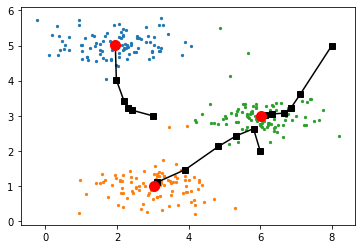

In [7]:
centroids, idx = runKMeans(X, initial_centroids, findClosestCentroids, computeCentroids, max_iters=20, view=True)

print('centroids:')
print(centroids)
print('idx:', idx.shape)

### 随机初始化

In [8]:
def kMeansInitCentroids(X, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    # =========== code here ============
    idxs = np.random.choice(X.shape[0], K)
    centroids = X[idxs, :]
    # ==================================

    return centroids

centroids:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


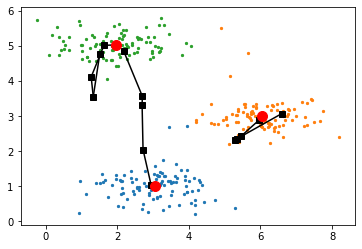

In [9]:
runKMeans(X, kMeansInitCentroids(X, K=3), findClosestCentroids, computeCentroids, max_iters=20, view=True)
print('centroids:')
print(centroids)

## Part 4: K-Means Clustering on Pixels

In [10]:
A = mpl.image.imread('ex7/bird_small.png')

X = A.reshape(-1, 3) / 255

K = 32
max_iters = 10

initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runKMeans(X, initial_centroids, findClosestCentroids, computeCentroids, max_iters=max_iters)

## Part 5: Image Compression

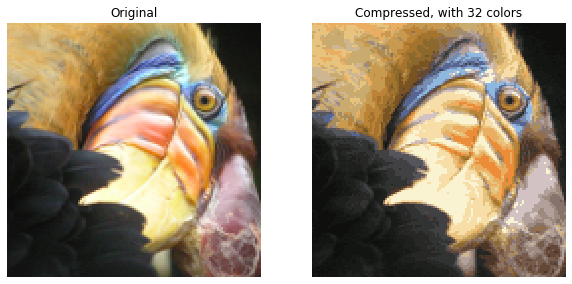

In [11]:
X_recovered = centroids[np.int8(idx),:].reshape(A.shape) * 255

_, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(A)
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(X_recovered)
ax[1].axis('off')
ax[1].set_title('Compressed, with %d colors' % K)
plt.show()

# ex7: Principle Component Analysis (PCA)

## Part 1: Load Example Dataset

X.shape: (50, 2)


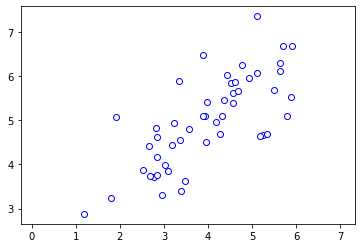

In [12]:
data = loadmat('ex7/ex7data1.mat')
X = data['X']
print('X.shape:', X.shape)

plt.plot(X[:,0], X[:,1], 'bo', mfc='white')
plt.axis('equal')
plt.show()

## Part 2: Principal Component Analysis

In [13]:
def pca(X):
    m, n = X.shape
    U = np.zeros(n)
    S = np.zeros(n)

    # =========== code here ============
    SIGMA = 1 / m * np.dot(X.T, X)
    U,S,V = np.linalg.svd(SIGMA)
    # ==================================

    return U, S

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

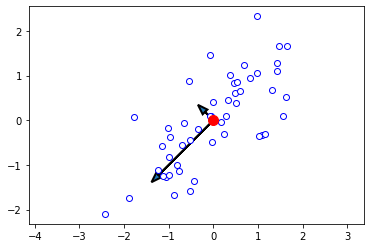

In [14]:
X_norm, mu, sigma = featureNormalize(X)

U, S = pca(X_norm)

plt.plot(X_norm[:,0], X_norm[:,1], 'bo', mfc='white')
plt.plot(0, 0, 'ro', ms=10)
plt.arrow(0, 0, S[0]*U[0,0], S[0]*U[0,1], head_width=0.15,lw=2)
plt.arrow(0, 0, S[1]*U[1,0], S[1]*U[1,1], head_width=0.15,lw=2)
plt.axis('equal')
plt.show()

## Part 3: Dimension Reduction

In [15]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))

    # =========== code here ============
    Z = np.dot(X, U[:, :K])
    # ==================================

    return Z

def recoverData(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    # =========== code here ============
    X_rec = np.dot(Z, U[:, :K].T)
    # ==================================

    return X_rec

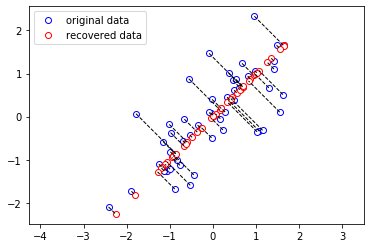

In [16]:
K = 1
Z = projectData(X_norm, U, K)
X_rec = recoverData(Z, U, K)

plt.plot(X_norm[:,0], X_norm[:,1], 'bo', mfc='white')
plt.plot(X_rec[:,0], X_rec[:,1], 'ro', mfc='white')
for i in np.arange(X_rec.shape[0]):
    plt.plot([X_norm[i,0],X_rec[i,0]], [X_norm[i,1],X_rec[i,1]], 'k--', lw=1)

plt.legend(['original data', 'recovered data'])
plt.axis('equal')
plt.show()

## Part 4: Loading and Visualizing Face Data

In [17]:
def displayData(X, rows=5, cols=5):
    w = int(np.round(np.sqrt(X.shape[1])))
    h = w

    pic = np.zeros((h*rows, w*cols))
    idxs = np.arange(rows * cols)

    i, j = 0, 0
    for idx in idxs:
        if i == cols:
            j += 1
            i = 0
        pic[j*h : (j+1)*h, i*w : (i+1)*w] = X[idx,:].reshape(w, h).T
        i += 1

    plt.imshow(pic, cmap='gray')
    plt.axis('off')

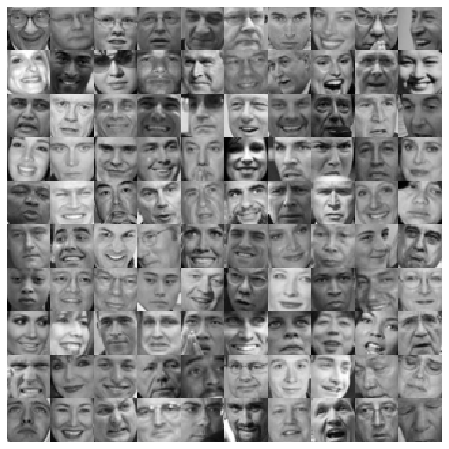

In [18]:
data = loadmat('ex7/ex7faces.mat')
X = data['X']

plt.figure(figsize=(8, 8))
displayData(X, rows=10, cols=10)
plt.show()

## Part 5: PCA on Face Data: Eigenfaces

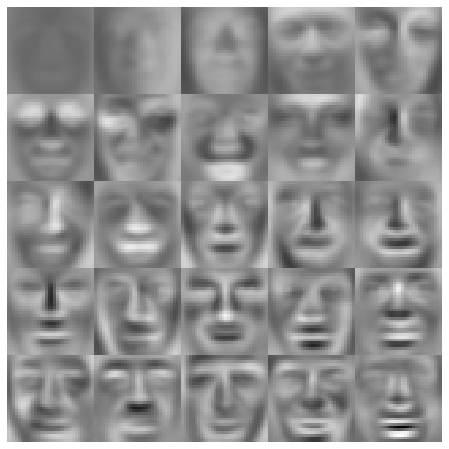

In [19]:
X_norm, mu, sigma = featureNormalize(X)

U, S = pca(X_norm)

plt.figure(figsize=(8,8))
displayData(U.T, 5, 5)
plt.show()

## Part 6: Dimension Reduction for Faces

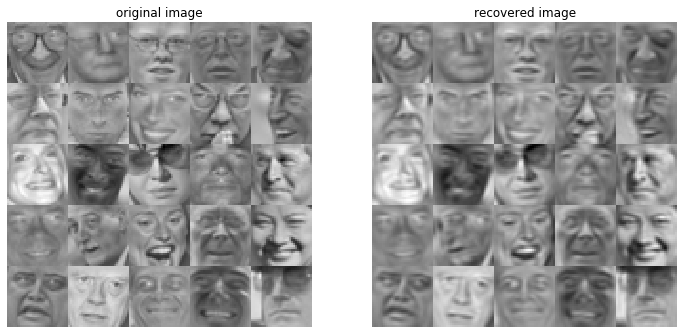

In [20]:
K = 200
Z = projectData(X_norm, U, K)
X_rec = recoverData(Z, U, K)

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
displayData(X_norm, 5, 5)
plt.title('original image')

plt.subplot(1,2,2)
displayData(X_rec, 5, 5)
plt.title('recovered image')

plt.show()